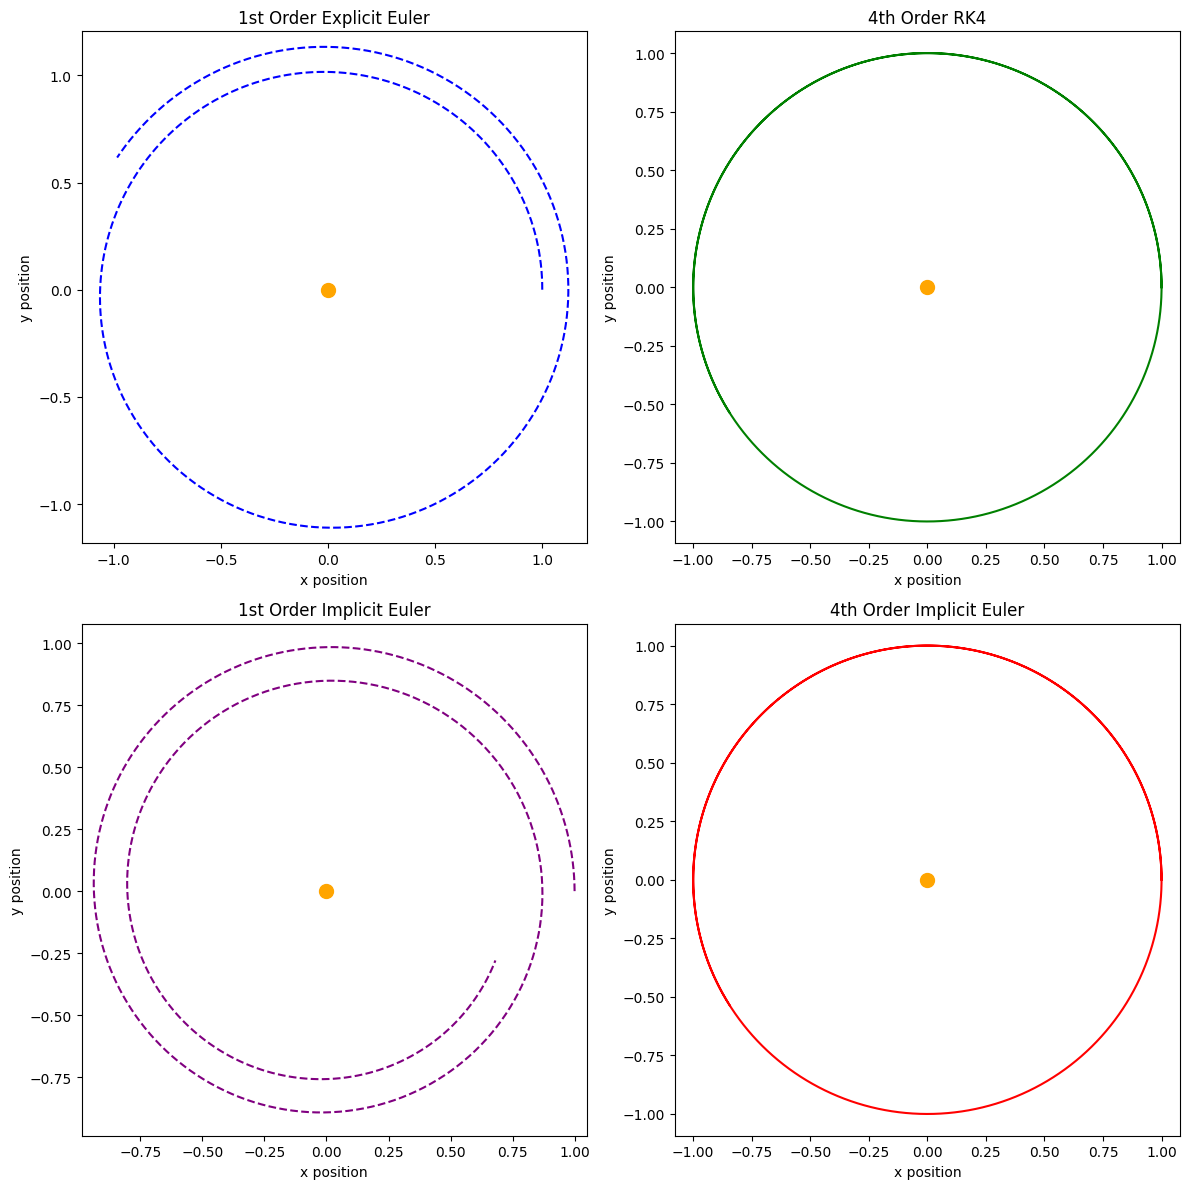

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 1.0  # Gravitational constant (normalized)
M = 1.0  # Mass of the central object (e.g., Sun in normalized units)
dt = 0.01  # Time step
T = 10.0  # Total simulation time
N = int(T / dt)  # Number of steps

def f(t, state, GM):
    r, v = state[:2], state[2:]
    r_norm = np.linalg.norm(r)
    a = -GM * r / r_norm**3
    return np.hstack((v, a))

def explicit_euler(f, t, state, dt, GM):
    return state + dt * f(t, state, GM)

def implicit_euler(f, t, state, dt, GM, tol=1e-6, max_iter=10000):
    new_state = state.copy()
    for _ in range(max_iter):
        state_guess = state + dt * f(t + dt, new_state, GM)
        if np.linalg.norm(state_guess - new_state) < tol:
            break
        new_state = state_guess
    return new_state

def rk4_step(f, t, state, dt, GM):
    k1 = dt * f(t, state, GM)
    k2 = dt * f(t + dt/2, state + k1/2, GM)
    k3 = dt * f(t + dt/2, state + k2/2, GM)
    k4 = dt * f(t + dt, state + k3, GM)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

def fourth_order_implicit_euler(f, t, state, dt, GM):
    k1 = dt * f(t, state, GM)
    k2 = dt * f(t + dt/2, state + k1/2, GM)
    k3 = dt * f(t + dt/2, state + k2/2, GM)
    k4 = dt * f(t + dt, state + k3, GM)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

def integrate(method, f, t0, tf, dt, state0, GM):
    t = np.arange(t0, tf, dt)
    states = np.zeros((len(t), len(state0)))
    states[0] = state0
    for i in range(1, len(t)):
        states[i] = method(f, t[i-1], states[i-1], dt, GM)
    return t, states

# Initial conditions (state = [x, y, vx, vy])
state0 = np.array([1.0, 0.0, 0.0, 1.0])

# Time integration
_, explicit_traj = integrate(explicit_euler, f, 0, T, dt, state0, G * M)
_, implicit_traj = integrate(implicit_euler, f, 0, T, dt, state0, G * M)
_, rk4_traj = integrate(rk4_step, f, 0, T, dt, state0, G * M)
_, implicit_rk4_traj = integrate(fourth_order_implicit_euler, f, 0, T, dt, state0, G * M)

# Extract positions
explicit_r = explicit_traj[:, :2]
implicit_r = implicit_traj[:, :2]
rk4_r = rk4_traj[:, :2]
implicit_rk4_r = implicit_rk4_traj[:, :2]

# Plot trajectories with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# 1st Order Explicit Euler
axs[0, 0].plot(explicit_r[:, 0], explicit_r[:, 1], linestyle='dashed', color='blue')
axs[0, 0].scatter(0, 0, color='orange', label='Sun', s=100)
axs[0, 0].set_xlabel('x position')
axs[0, 0].set_ylabel('y position')
axs[0, 0].set_title('1st Order Explicit Euler')
axs[0, 0].axis('equal')

# 4th Order RK4
axs[0, 1].plot(rk4_r[:, 0], rk4_r[:, 1], color='green')
axs[0, 1].scatter(0, 0, color='orange', label='Sun', s=100)
axs[0, 1].set_xlabel('x position')
axs[0, 1].set_ylabel('y position')
axs[0, 1].set_title('4th Order RK4')
axs[0, 1].axis('equal')

# 1st Order Implicit Euler
axs[1, 0].plot(implicit_r[:, 0], implicit_r[:, 1], linestyle='dashed', color='purple')
axs[1, 0].scatter(0, 0, color='orange', label='Sun', s=100)
axs[1, 0].set_xlabel('x position')
axs[1, 0].set_ylabel('y position')
axs[1, 0].set_title('1st Order Implicit Euler')
axs[1, 0].axis('equal')

# 4th Order Implicit Euler
axs[1, 1].plot(implicit_rk4_r[:, 0], implicit_rk4_r[:, 1], color='red')
axs[1, 1].scatter(0, 0, color='orange', label='Sun', s=100)
axs[1, 1].set_xlabel('x position')
axs[1, 1].set_ylabel('y position')
axs[1, 1].set_title('4th Order Implicit Euler')
axs[1, 1].axis('equal')

plt.tight_layout()
plt.show()

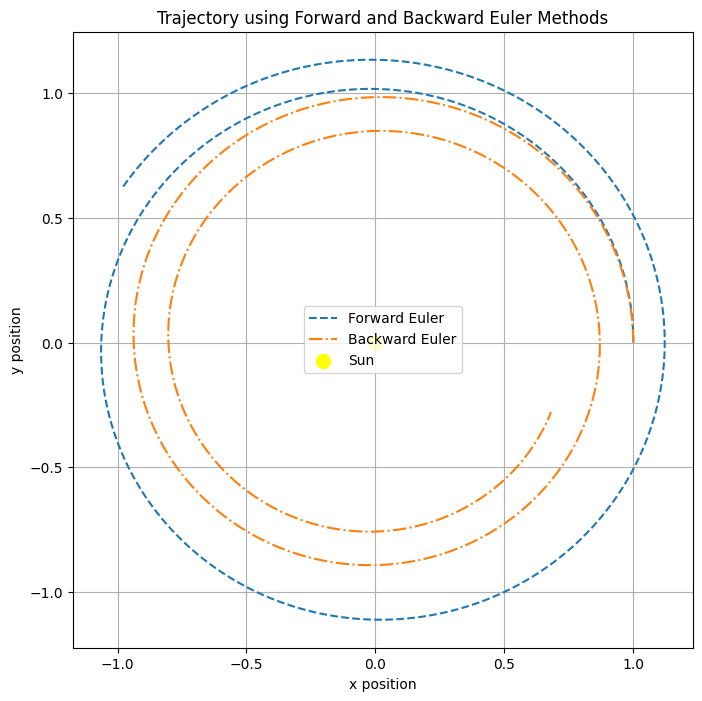

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 1.0  # Gravitational constant (normalized)
M = 1.0  # Mass of the central object (e.g., Sun in normalized units)
dt = 0.01  # Time step
T = 10.0  # Total simulation time
N = int(T / dt)  # Number of steps

# Initial conditions (assume unit mass, circular orbit for simplicity)
r0 = np.array([1.0, 0.0])  # Initial position
v0 = np.array([0.0, 1.0])  # Initial velocity

# Forward Euler Method
rf = np.zeros((N, 2))
vf = np.zeros((N, 2))
rf[0] = r0
vf[0] = v0

for i in range(N - 1):
    r = rf[i]
    v = vf[i]
    r_norm = np.linalg.norm(r)
    a = -G * M * r / r_norm**3
    vf[i + 1] = v + dt * a
    rf[i + 1] = r + dt * v

# Backward Euler Method (implicit)
rb = np.zeros((N, 2))
vb = np.zeros((N, 2))
rb[0] = r0
vb[0] = v0

for i in range(N - 1):
    r = rb[i]
    v = vb[i]
    
    # Estimate next velocity using forward Euler step (initial guess)
    r_norm = np.linalg.norm(r)
    a_next = -G * M * r / r_norm**3
    v_next = v + dt * a_next
    
    # Correct using backward step
    r_next = r + dt * v_next
    r_norm_next = np.linalg.norm(r_next)
    a_next_corrected = -G * M * r_next / r_norm_next**3
    v_next = v + dt * a_next_corrected
    
    vb[i + 1] = v_next
    rb[i + 1] = r + dt * v_next

# Plot trajectories
plt.figure(figsize=(8, 8))
plt.plot(rf[:, 0], rf[:, 1], label="Forward Euler", linestyle='--')
plt.plot(rb[:, 0], rb[:, 1], label="Backward Euler", linestyle='-.')
plt.scatter(0, 0, color='yellow', label='Sun', s=100)
plt.xlabel("x position")
plt.ylabel("y position")
plt.legend()
plt.title("Trajectory using Forward and Backward Euler Methods")
plt.grid()
plt.show()

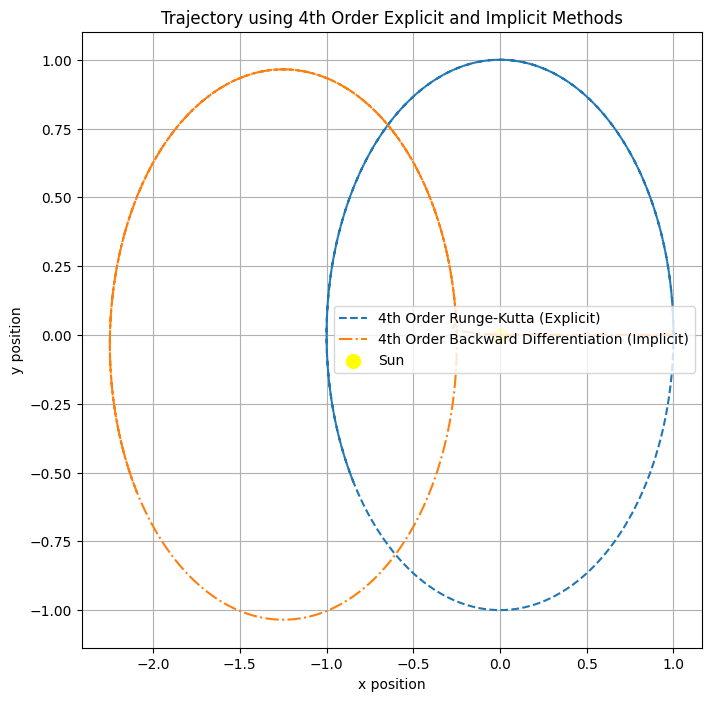

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 1.0  # Gravitational constant (normalized)
M = 1.0  # Mass of the central object (e.g., Sun in normalized units)
dt = 0.01  # Time step
T = 10.0  # Total simulation time
N = int(T / dt)  # Number of steps

# Initial conditions (assume unit mass, circular orbit for simplicity)
r0 = np.array([1.0, 0.0])  # Initial position
v0 = np.array([0.0, 1.0])  # Initial velocity

# 4th Order Runge-Kutta (Explicit)
rk4_r = np.zeros((N, 2))
rk4_v = np.zeros((N, 2))
rk4_r[0] = r0
rk4_v[0] = v0

def acceleration(r):
    r_norm = np.linalg.norm(r)
    return -G * M * r / r_norm**3

for i in range(N - 1):
    r = rk4_r[i]
    v = rk4_v[i]
    
    k1v = dt * acceleration(r)
    k1r = dt * v
    
    k2v = dt * acceleration(r + 0.5 * k1r)
    k2r = dt * (v + 0.5 * k1v)
    
    k3v = dt * acceleration(r + 0.5 * k2r)
    k3r = dt * (v + 0.5 * k2v)
    
    k4v = dt * acceleration(r + k3r)
    k4r = dt * (v + k3v)
    
    rk4_v[i + 1] = v + (k1v + 2*k2v + 2*k3v + k4v) / 6
    rk4_r[i + 1] = r + (k1r + 2*k2r + 2*k3r + k4r) / 6

# 4th Order Backward Differentiation Formula (Implicit, approximated iteratively)
bdf4_r = np.zeros((N, 2))
bdf4_v = np.zeros((N, 2))
bdf4_r[0] = r0
bdf4_v[0] = v0

for i in range(3, N - 1):
    r = bdf4_r[i]
    v = bdf4_v[i]
    
    # Estimate using explicit RK4 as predictor
    r_pred = rk4_r[i + 1]
    v_pred = rk4_v[i + 1]
    
    # Correct using implicit BDF4
    r_next = (48/25) * r - (36/25) * bdf4_r[i - 1] + (16/25) * bdf4_r[i - 2] - (3/25) * bdf4_r[i - 3] + (12/25) * dt * v_pred
    v_next = (48/25) * v - (36/25) * bdf4_v[i - 1] + (16/25) * bdf4_v[i - 2] - (3/25) * bdf4_v[i - 3] + (12/25) * dt * acceleration(r_pred)
    
    bdf4_r[i + 1] = r_next
    bdf4_v[i + 1] = v_next

# Plot trajectories
plt.figure(figsize=(8, 8))
plt.plot(rk4_r[:, 0], rk4_r[:, 1], label="4th Order Runge-Kutta (Explicit)", linestyle='--')
plt.plot(bdf4_r[:, 0], bdf4_r[:, 1], label="4th Order Backward Differentiation (Implicit)", linestyle='-.')
plt.scatter(0, 0, color='yellow', label='Sun', s=100)
plt.xlabel("x position")
plt.ylabel("y position")
plt.legend()
plt.title("Trajectory using 4th Order Explicit and Implicit Methods")
plt.grid()
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 1.0  # Gravitational constant (normalized)
M = 1.0  # Mass of the central object (e.g., Sun in normalized units)
dt = 0.01  # Initial time step
T = 10.0  # Total simulation time
N = int(T / dt)  # Number of steps

def acceleration(r):
    r_norm = np.linalg.norm(r)
    return -G * M * r / r_norm**3

# Adaptive time step control
adaptive_dt = True  # Enable adaptive time stepping
dt_min, dt_max = 0.001, 0.02  # Min and max time step
error_tolerance = 1e-6  # Adaptive error threshold

# Initial conditions (assume unit mass, circular orbit for simplicity)
r0 = np.array([1.0, 0.0])  # Initial position
v0 = np.array([0.0, 1.0])  # Initial velocity

# 4th Order Runge-Kutta (Explicit) with Adaptive Time-Stepping
rk4_r = [r0]
rk4_v = [v0]
time_steps = [0]

t = 0
while t < T:
    r = rk4_r[-1]
    v = rk4_v[-1]
    
    k1v = dt * acceleration(r)
    k1r = dt * v
    
    k2v = dt * acceleration(r + 0.5 * k1r)
    k2r = dt * (v + 0.5 * k1v)
    
    k3v = dt * acceleration(r + 0.5 * k2r)
    k3r = dt * (v + 0.5 * k2v)
    
    k4v = dt * acceleration(r + k3r)
    k4r = dt * (v + k3v)
    
    v_new = v + (k1v + 2*k2v + 2*k3v + k4v) / 6
    r_new = r + (k1r + 2*k2r + 2*k3r + k4r) / 6
    
    rk4_r.append(r_new)
    rk4_v.append(v_new)
    t += dt
    time_steps.append(t)
    
    if adaptive_dt:
        # Estimate local truncation error (heuristic approach)
        error_estimate = np.linalg.norm(k4r - k3r)
        if error_estimate > error_tolerance:
            dt = max(dt / 2, dt_min)  # Reduce time step if error is too large
        elif error_estimate < error_tolerance / 10:
            dt = min(dt * 2, dt_max)  # Increase time step if error is very small

# Convert lists to arrays
rk4_r = np.array(rk4_r)

# 4th Order Backward Differentiation Formula (Implicit) with Correction
bdf4_r = [r0]
bdf4_v = [v0]

for i in range(3, len(rk4_r) - 1):
    r = bdf4_r[-1]
    v = bdf4_v[-1]
    
    # Use RK4 as a predictor step
    r_pred = rk4_r[i + 1]
    v_pred = rk4_v[i + 1]
    
    # Correct using implicit BDF4 with Newton-Raphson iteration
    for _ in range(3):  # Iterative refinement for better accuracy
        a_next = acceleration(r_pred)
        v_pred = (48/25) * v - (36/25) * bdf4_v[-1] + (16/25) * bdf4_v[-2] - (3/25) * bdf4_v[-3] + (12/25) * dt * a_next
        r_pred = (48/25) * r - (36/25) * bdf4_r[-1] + (16/25) * bdf4_r[-2] - (3/25) * bdf4_r[-3] + (12/25) * dt * v_pred
    
    bdf4_r.append(r_pred)
    bdf4_v.append(v_pred)

# Convert lists to arrays
bdf4_r = np.array(bdf4_r)

# Plot trajectories
plt.figure(figsize=(8, 8))
plt.plot(rk4_r[:, 0], rk4_r[:, 1], label="4th Order Runge-Kutta (Explicit, Adaptive)", linestyle='--')
plt.plot(bdf4_r[:, 0], bdf4_r[:, 1], label="4th Order Backward Differentiation (Implicit, Refined)", linestyle='-.')
plt.scatter(0, 0, color='yellow', label='Sun', s=100)
plt.xlabel("x position")
plt.ylabel("y position")
plt.legend()
plt.title("Trajectory using 4th Order Explicit and Implicit Methods with Adaptive Time-Stepping")
plt.grid()
plt.show()


IndexError: list index out of range